In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
os.chdir('E:/Data-Science/Python')

**NASA data set, obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel.

Attribute Information:

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.

In [99]:
df = pd.read_table('airfoil_self_noise.dat',header = None, \
    names = ['Frequency(Hz)', 'Angle of attack(degree)', 'chord length(m)', 'Free stream velocity', 'Suction side displacement thickness(m)', 'Sound Pressure levels(decibel)'])
df.head()

,Frequency(Hz),Angle of attack(degree),chord length(m),Free stream velocity,Suction side displacement thickness(m),Sound Pressure levels(decibel)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


**create X and y matrices

In [100]:
X = df.iloc[:,0:5]
y = df.iloc[:,5]

**Normalize X matrix features

In [101]:
X = ((X - X.mean()) / (X.max() - X.min()))
X.head()

,Frequency(Hz),Angle of attack(degree),chord length(m),Free stream velocity,Suction side displacement thickness(m)
0,-0.105373,-0.305509,0.60219,0.516143,-0.14612
1,-0.095272,-0.305509,0.60219,0.516143,-0.14612
2,-0.082645,-0.305509,0.60219,0.516143,-0.14612
3,-0.064969,-0.305509,0.60219,0.516143,-0.14612
4,-0.044767,-0.305509,0.60219,0.516143,-0.14612


In [102]:
X = np.array(X)
X = np.append(np.ones((len(y),1)), X, axis = 1)
y = np.array(y).reshape(df.shape[0],1)

In [103]:
def compute_costfunc(X, y, theta):
    m = len(y)
    h = np.dot(X, theta) #hypothesis, predicted value
    return (np.sum((h-y)**2)) /(2*m)    

In [108]:
def gradientdescent(x, y, theta, alpha, iterations):
    m = len(y)
    c = []
    for _ in range(iterations):
        descent = np.dot(X.T,np.dot(X, theta) - y)
        theta = theta - ((alpha/m) * descent)
        c.append(compute_costfunc(X, y, theta))
    return c, theta

In [105]:
theta = np.zeros((df.shape[1],1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [106]:
print(compute_costfunc(X, y, theta))

7815.786204458415


In [118]:
C_1, theta_1 = gradientdescent(X, y, theta, 0.01, 1500)
C_2, theta_2 = gradientdescent(X, y, theta, 0.03, 1500)
C_3, theta_3 = gradientdescent(X, y, theta, 0.3, 1500)
C_4, theta_4 = gradientdescent(X, y, theta, 1, 1500)

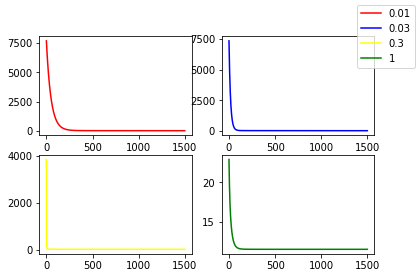

In [199]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(C_1, label = '0.01', color = 'red')
ax[0,1].plot(C_2, label = '0.03', color = 'blue')
ax[1,0].plot(C_3, label = '0.3', color = 'yellow')
ax[1,1].plot(C_4, label = '1', color = 'green')
#plt.xlabel('Number of Iterations')
#plt.ylabel('C (\u03F4)')
#plttitle('Gradient decent curve')
#plt.xticks(np.arange(0,1500,50))
#plt.yticks(np.arange(0,1500,50))
fig.legend()
plt.show()